In [1]:
PROJECT   = 'pide23f7ea9d71'
READ_KEY  = 'd5c81802-a1f6-46a2-ad31-8be10d7172f4'

URL = "https://cenote.sidero.services/api/projects/" + PROJECT

import requests

def cenote_get(event_name, query_type, query_dict={}):
    get_url = "{0}/queries/{1}".format(URL, query_type)
    query_dict["readKey"] = READ_KEY
    query_dict["event_collection"] = event_name
    r = requests.get(get_url, query_dict)
    r = dict(r.json())
    if r["ok"]:
        return r["results"]
    else:
        raise RuntimeError("Query unsuccessful due to {0}. Message is: {1}".format(
            r["results"], r["message"]))
        
import pandas

# Custom filter on extraction to get data from a given sensor only
cus_filter = '[{"property_name":"un","operator":"eq","property_value":"ADU-700HP_V2"}]'
res = cenote_get("measurements", "extraction", {"filters": cus_filter, "latest": 50000})

# Transform query result to a pandas DataFrame
df = pandas.DataFrame(res)
df = df.sort_values(by="epoch").drop_duplicates(subset="epoch").reset_index(drop=True)

# Convert keys
df = df.convert_dtypes()
keys = ['solar', 'precipitation', 'windspeed', 'winddirection', 'temperature', 'humidity', 
        'cntv2', 'vwc1', 'temp1', 'ec1', 'vwc2', 'temp2', 'ec2', 'analogv1', 'cntv1',
        'analogv3', 'cntv3', 'cntvm']

for key in keys:
    df[key] = pandas.to_numeric(df[key], errors="coerce")

df.epoch = pandas.to_datetime(df.epoch, unit='ms')

import numpy as np

df.loc[df.temperature < -100, ('temperature')] = np.nan
for key in ["windspeed", "winddirection", "temperature", "humidity"]:
    df.loc[df[key] < 0, (key)] = np.nan

In [2]:
df

,filename,f,pn,uid,un,dt,ch,gps,epoch,solar,...,uuid,cenote$created_at,cenote$timestamp,cenote$id,ai21temp,ai22rh,ai23cnt1,ai31level,ai32cnt1,unknown16
0,ADU-700HP_V2_200414202030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,14/04/2020 14:25:24,18,0,2020-04-14 14:35:24,0.0,...,1326f417-f302-4dd6-8719-2b637d6db30b,1602993114712,1602993114712,d36ebcf6-2195-49b1-bfc5-d815003cadac,None,None,None,None,None,<NA>
1,ADU-700HP_V2_200414202030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,14/04/2020 14:25:24,18,0,2020-04-14 14:40:24,0.0,...,38b3ee16-44a9-4aa2-bfdb-7177daf790c6,1602993114915,1602993114915,9e22f8d9-3174-48fc-b1d8-a3af2974cafd,None,None,None,None,None,<NA>
2,ADU-700HP_V2_200414202030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,14/04/2020 14:25:24,18,0,2020-04-14 14:45:24,0.0,...,f11d36a0-01a0-4ebc-85bb-df5d5a7b8258,1602993115120,1602993115120,277e66e4-6bd9-42c9-b44c-d5142ddc3f9d,None,None,None,None,None,<NA>
3,ADU-700HP_V2_200414202030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,14/04/2020 14:25:24,18,0,2020-04-14 14:50:24,0.0,...,8c7fde3c-c4d5-4da1-ae54-d6cc42bb236f,1602993115327,1602993115327,5b3c09db-50c3-48e9-8016-21e30e533ec3,None,None,None,None,None,<NA>
4,ADU-700HP_V2_200414202030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,14/04/2020 14:25:24,18,0,2020-04-14 14:55:24,0.0,...,88accb33-cf33-4c98-9f28-cc43546b2337,1602993115537,1602993115537,c59b9757-4cef-4545-8377-653f1b739e50,None,None,None,None,None,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,ADU-700HP_V2_201019104530.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,19/10/2020 04:50:24,18,0,2020-10-19 07:30:24,297.0,...,1b1625de-7e8f-4a63-8d1a-646a70dfa78c,1603093824682,1603093824682,abe1e398-25c4-4ddb-9041-4b1bdce49c88,None,None,None,None,None,<NA>
49996,ADU-700HP_V2_201019104530.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,19/10/2020 04:50:24,18,0,2020-10-19 07:35:24,311.0,...,eebaea03-652a-4029-b7aa-59b708b63d52,1603093824910,1603093824910,46cb90f7-33f1-4ee8-9f00-83194a0dd137,None,None,None,None,None,<NA>
49997,ADU-700HP_V2_201019104530.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,19/10/2020 04:50:24,18,0,2020-10-19 07:40:24,329.0,...,9a461c49-fe2e-4053-bc0b-6d42324bed6a,1603093825126,1603093825126,d0247594-191d-42dd-ad70-c1a4b5a8105c,None,None,None,None,None,<NA>
49998,ADU-700HP_V2_201019104530.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,19/10/2020 04:50:24,18,0,2020-10-19 07:45:24,242.0,...,342ecccf-dbe5-4ca5-b95f-02a57908c782,1603093825361,1603093825361,b428267f-fb0e-4039-a1a3-b7dae676ec57,None,None,None,None,None,<NA>


In [3]:
df.columns

Index(['filename', 'f', 'pn', 'uid', 'un', 'dt', 'ch', 'gps', 'epoch', 'solar',
       'precipitation', 'windspeed', 'winddirection', 'temperature',
       'humidity', 'cntv2', 'vwc1', 'temp1', 'ec1', 'vwc2', 'temp2', 'ec2',
       'analogv1', 'cntv1', 'analogv3', 'cntv3', 'cntvm', 'uuid',
       'cenote$created_at', 'cenote$timestamp', 'cenote$id', 'ai21temp',
       'ai22rh', 'ai23cnt1', 'ai31level', 'ai32cnt1', 'unknown16'],
      dtype='object')

# Weather forecast

## Build a meteo DataFrame

### Select only the relevant features (columns)

In [4]:
meteo_df = df[['epoch', 'solar', 'precipitation', 'windspeed', 'winddirection', 'humidity', 'temperature']]
meteo_df

,epoch,solar,precipitation,windspeed,winddirection,humidity,temperature
0,2020-04-14 14:35:24,0.0,0.0,1.39,87.8,0.519,19.1
1,2020-04-14 14:40:24,0.0,0.0,1.79,95.8,0.512,19.1
2,2020-04-14 14:45:24,0.0,0.0,2.07,101.7,0.493,19.1
3,2020-04-14 14:50:24,0.0,0.0,2.59,100.2,0.483,19.1
4,2020-04-14 14:55:24,0.0,0.0,1.64,96.6,0.482,18.9
...,...,...,...,...,...,...,...
49995,2020-10-19 07:30:24,297.0,0.0,0.89,171.3,0.564,16.5
49996,2020-10-19 07:35:24,311.0,0.0,1.01,188.4,0.558,16.5
49997,2020-10-19 07:40:24,329.0,0.0,0.96,161.0,0.544,16.9
49998,2020-10-19 07:45:24,242.0,0.0,1.20,200.7,0.549,16.9


### Resample to 3 hours

In [5]:
meteo_df = meteo_df.set_index("epoch").resample("3H").mean()
meteo_df

,solar,precipitation,windspeed,winddirection,humidity,temperature
epoch,,,,,,
2020-04-14 12:00:00,0.000000,0.0,1.896000,96.420000,0.497800,19.060000
2020-04-14 15:00:00,0.000000,0.0,1.084167,204.352778,0.699333,16.322222
2020-04-14 18:00:00,0.000000,0.0,0.488889,116.183333,0.909639,13.241667
2020-04-14 21:00:00,0.000000,0.0,1.804167,251.505556,0.789417,13.622222
2020-04-15 00:00:00,0.000000,0.0,3.408571,302.885714,0.706600,11.751429
...,...,...,...,...,...,...
2020-10-18 18:00:00,0.000000,0.0,1.589231,314.315385,0.512692,16.000000
2020-10-18 21:00:00,0.000000,0.0,1.644167,303.191667,0.544472,14.708333
2020-10-19 00:00:00,0.000000,0.0,0.989722,174.311111,0.642278,11.922222


## Build a dataset --- predict given the current settings the temperature in 3 hours!

In [6]:
dataset_df = meteo_df.copy(deep=True)

### Extra feature: hour in 24 hour format

In [7]:
dataset_df.loc[:, ("hour")] = [obj.hour for obj in meteo_df.index.time]
dataset_df

,solar,precipitation,windspeed,winddirection,humidity,temperature,hour
epoch,,,,,,,
2020-04-14 12:00:00,0.000000,0.0,1.896000,96.420000,0.497800,19.060000,12
2020-04-14 15:00:00,0.000000,0.0,1.084167,204.352778,0.699333,16.322222,15
2020-04-14 18:00:00,0.000000,0.0,0.488889,116.183333,0.909639,13.241667,18
2020-04-14 21:00:00,0.000000,0.0,1.804167,251.505556,0.789417,13.622222,21
2020-04-15 00:00:00,0.000000,0.0,3.408571,302.885714,0.706600,11.751429,0
...,...,...,...,...,...,...,...
2020-10-18 18:00:00,0.000000,0.0,1.589231,314.315385,0.512692,16.000000,18
2020-10-18 21:00:00,0.000000,0.0,1.644167,303.191667,0.544472,14.708333,21
2020-10-19 00:00:00,0.000000,0.0,0.989722,174.311111,0.642278,11.922222,0


### Add a column with the future temperature (the target variable)

In [8]:
future_temp = dataset_df.temperature.tolist()
# Delete the first element to offset all by one ...
future_temp = future_temp[1:]
# Delete the last row of dataset_df as we have no target for it ...
dataset_df.drop(dataset_df.tail(1).index,inplace=True)
# And now add the target!
dataset_df.loc[:, ('future_temperature')] = future_temp
dataset_df

,solar,precipitation,windspeed,winddirection,humidity,temperature,hour,future_temperature
epoch,,,,,,,,
2020-04-14 12:00:00,0.000000,0.0,1.896000,96.420000,0.497800,19.060000,12,16.322222
2020-04-14 15:00:00,0.000000,0.0,1.084167,204.352778,0.699333,16.322222,15,13.241667
2020-04-14 18:00:00,0.000000,0.0,0.488889,116.183333,0.909639,13.241667,18,13.622222
2020-04-14 21:00:00,0.000000,0.0,1.804167,251.505556,0.789417,13.622222,21,11.751429
2020-04-15 00:00:00,0.000000,0.0,3.408571,302.885714,0.706600,11.751429,0,7.480556
...,...,...,...,...,...,...,...,...
2020-10-18 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,15,16.000000
2020-10-18 18:00:00,0.000000,0.0,1.589231,314.315385,0.512692,16.000000,18,14.708333
2020-10-18 21:00:00,0.000000,0.0,1.644167,303.191667,0.544472,14.708333,21,11.922222


In [9]:
dataset_df = dataset_df.dropna()
dataset_df

,solar,precipitation,windspeed,winddirection,humidity,temperature,hour,future_temperature
epoch,,,,,,,,
2020-04-14 12:00:00,0.000000,0.0,1.896000,96.420000,0.497800,19.060000,12,16.322222
2020-04-14 15:00:00,0.000000,0.0,1.084167,204.352778,0.699333,16.322222,15,13.241667
2020-04-14 18:00:00,0.000000,0.0,0.488889,116.183333,0.909639,13.241667,18,13.622222
2020-04-14 21:00:00,0.000000,0.0,1.804167,251.505556,0.789417,13.622222,21,11.751429
2020-04-15 00:00:00,0.000000,0.0,3.408571,302.885714,0.706600,11.751429,0,7.480556
...,...,...,...,...,...,...,...,...
2020-10-18 09:00:00,563.666667,0.0,2.201111,269.119444,0.489139,22.069444,9,22.695652
2020-10-18 18:00:00,0.000000,0.0,1.589231,314.315385,0.512692,16.000000,18,14.708333
2020-10-18 21:00:00,0.000000,0.0,1.644167,303.191667,0.544472,14.708333,21,11.922222


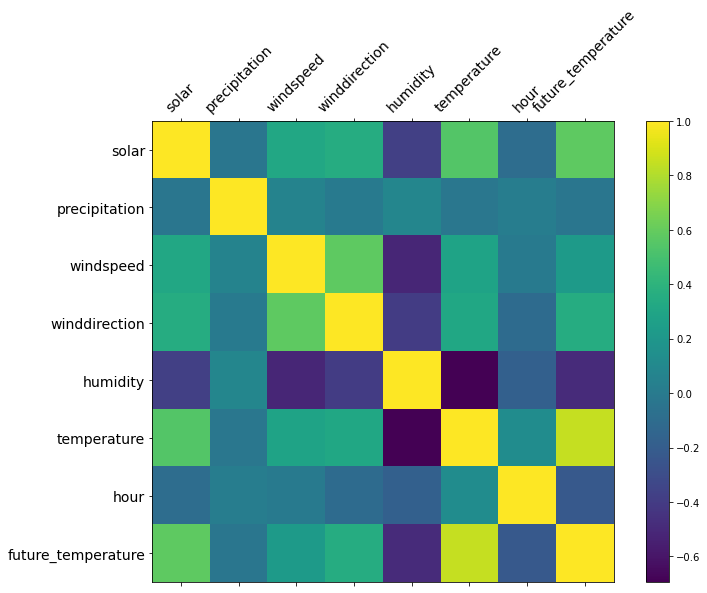

In [10]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(11.69, 8.27))
plt.matshow(dataset_df.corr(), fignum=f.number)
plt.xticks(range(dataset_df.shape[1]), dataset_df.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset_df.shape[1]), dataset_df.columns, fontsize=14)
cb = plt.colorbar()

## Use scikit-learn to build a model


[sklearn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

### Create numpy arrays 

In [11]:
X = dataset_df.loc[:, dataset_df.columns != 'future_temperature'].to_numpy()
y = dataset_df.loc[:, dataset_df.columns == 'future_temperature'].to_numpy().flatten()
y

array([16.32222222, 13.24166667, 13.62222222, ..., 11.92222222,
       10.49166667, 14.66086957])

### Split the data to training and testing

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=2020)

In [13]:
print("Training size: {0}\n Testing size: {1}".format(
    len(y_train), len(y_test)))

Training size: 929
 Testing size: 459


### Build a model

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

y_hat = reg.predict(X_test)

### Validate --- Model assessment

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

print("RMSE: {0:.2f}, R2: {1:.2f}".format( 
      sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat)),
      r2_score(y_true=y_test, y_pred=y_hat)
     ))

RMSE: 2.29, R2: 0.84


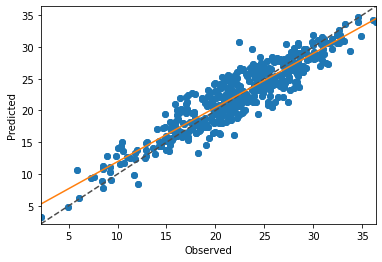

In [16]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_hat, 'o')

axis_min = min(min(y_test), min(y_hat))
axis_max = max(max(y_test), max(y_hat))

plt.scatter(y_test, y_hat, linestyle="None", marker="o")
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.plot([axis_min, axis_max], [axis_min, axis_max], ls="--", c=".3")
m, b = np.polyfit(y_test, y_hat, 1)
step = (axis_max - axis_min ) / 100
x_lsq = np.arange(axis_min, axis_max+step, step)
plt.plot(x_lsq, [i * m + b for i in x_lsq], '-')